In [ ]:
from MD_fns import *
import matplotlib.pyplot as plt
import numpy as np

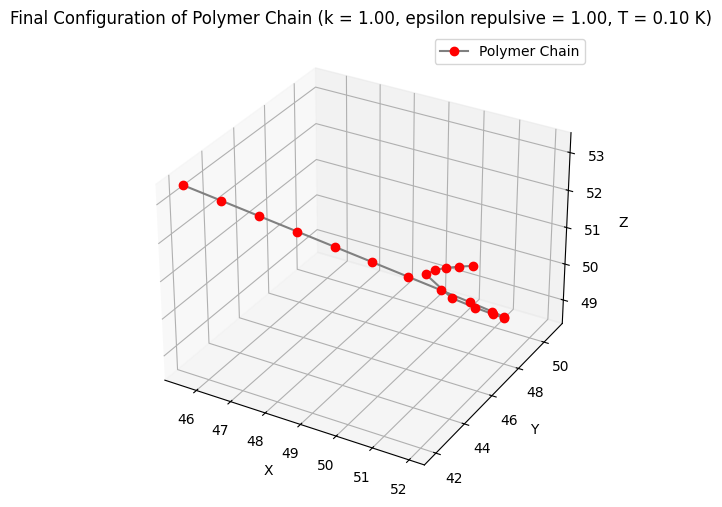

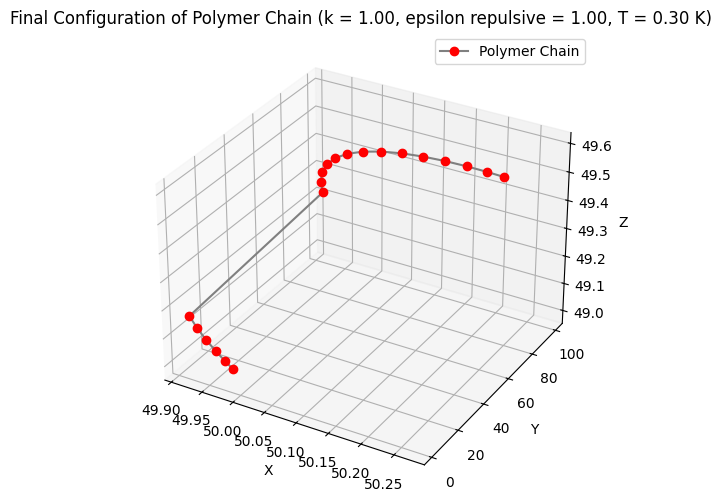

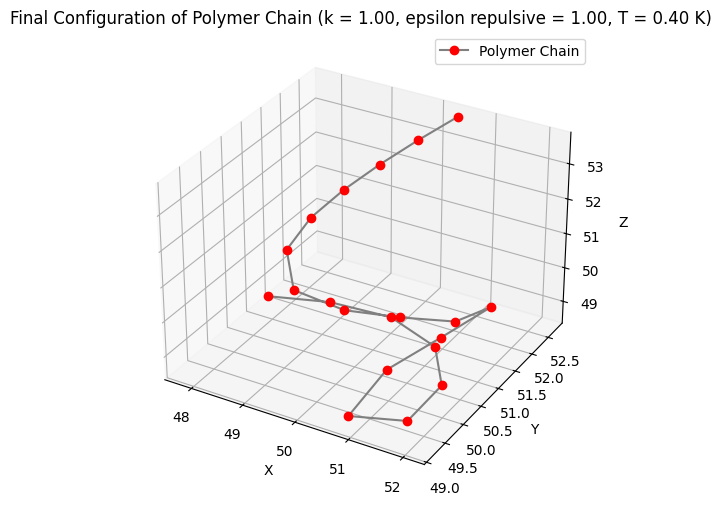

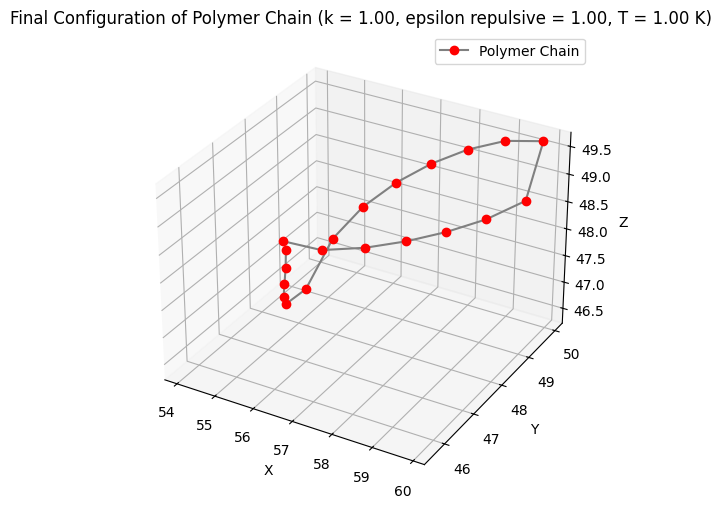

In [6]:
#Simulation 1: k = 1 e_rep = 1
k = 1
e_repulsive = 1
temperatures = np.linspace(0.1, 1.0, 10)

Rg_values = []
Ree_values = []
potential_energies = []

for T in temperatures:
    # Set target temperature
    target_temperature = T
    # Re-initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, T, mass)
    
    # Run simulation
    positions_history = []
    potential_energy_sum = 0
    for step in range(total_steps):
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive

        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass)

        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, T, mass)
            
            positions_history.append(positions.copy())

        # Accumulate potential energy 
        potential_energy_sum += compute_potential_energy(positions, k, r0, epsilon_repulsive, epsilon_attractive, sigma, box_size)
   
    # Compute analysis properties
    Rg = calculate_radius_of_gyration(positions)
    Ree = calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    potential_energies.append(np.mean(potential_energy_sum))
    
    # Plot the final configurations of the polymer chain
    final_positions = positions_history[-1]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2], '-o', color ='grey', markerfacecolor ='red', markeredgecolor ='red', label='Polymer Chain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Final Configuration of Polymer Chain (k = {k:.2f}, epsilon repulsive = {epsilon_repulsive:.2f}, T = {T:.2f} K)')
    ax.legend()
    plt.show()



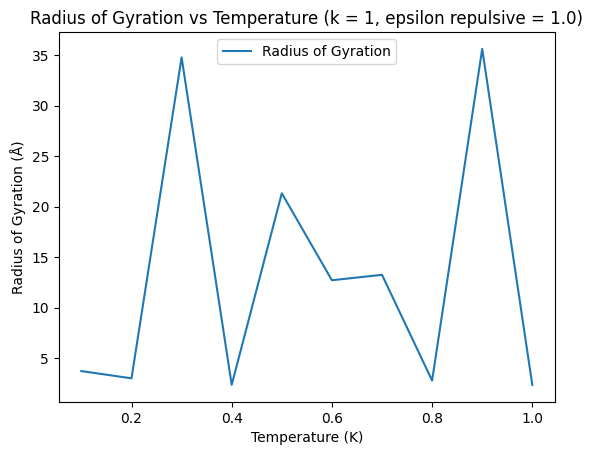

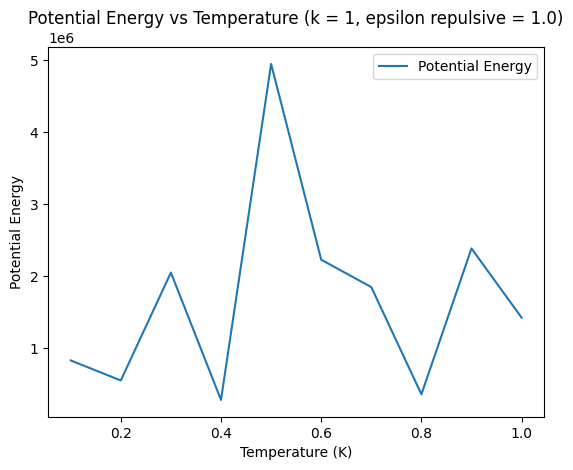

In [7]:
# Plot Radius of Gyration vs Temperature
plt.figure()
plt.plot(temperatures, Rg_values, label='Radius of Gyration')
plt.xlabel('Temperature (K)')
plt.ylabel('Radius of Gyration (Å)')
plt.title(f'Radius of Gyration vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()

# Plot End-to-End Distance vs Temperature
plt.figure()
plt.plot(temperatures, Ree_values, label='End-to-End Distance')
plt.xlabel('Temperature (K)')
plt.ylabel('End-to-End Distance (Å)')
plt.title(f'End-to-End Distance vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()

# Plot Potential Energy vs Temperature
plt.figure()
plt.plot(temperatures, potential_energies, label='Potential Energy')
plt.xlabel('Temperature (K)')
plt.ylabel('Potential Energy')
plt.title(f'Potential Energy vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()

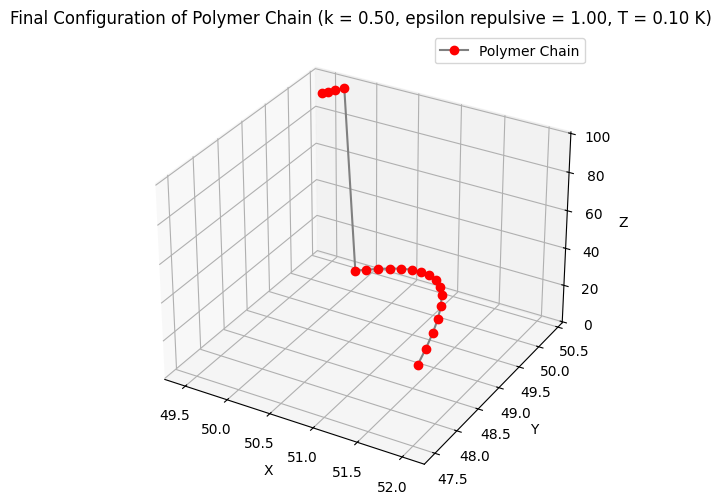

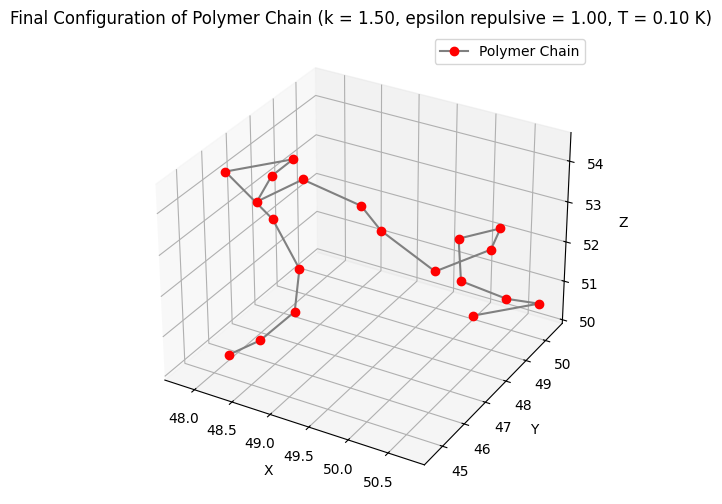

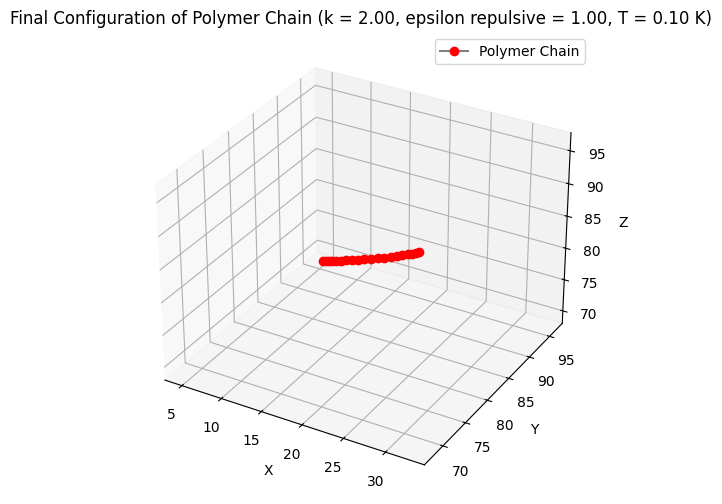

In [9]:
#Simulation 2: Varying k at low temp
ks = np.linspace(0, 2, 5)
e_repulsive = 1
target_temp = 0.1

Rg_values = []
Ree_values = []
potential_energies = []

for k in ks:
    # Re-initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, T, mass)
    
    # Run simulation
    positions_history = []
    potential_energy_sum = 0
    for step in range(total_steps):
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive

        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass)

        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, T, mass)
            
            positions_history.append(positions.copy())

        # Accumulate potential energy 
        potential_energy_sum += compute_potential_energy(positions, k, r0, epsilon_repulsive, epsilon_attractive, sigma, box_size)
   
    # Compute properties
    Rg = calculate_radius_of_gyration(positions)
    Ree = calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    potential_energies.append(np.mean(potential_energy_sum))
    
    # Plot the final configurations of the polymer chain
    final_positions = positions_history[-1]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2], '-o', color ='grey', markerfacecolor ='red', markeredgecolor ='red', label='Polymer Chain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Final Configuration of Polymer Chain (k = {k:.2f}, epsilon repulsive = {epsilon_repulsive:.2f}, T = {target_temp:.2f} K)')
    ax.legend()
    plt.show()



In [11]:
# Plot Radius of Gyration vs spring constant
plt.figure()
plt.plot(ks, Rg_values, label='Radius of Gyration')
plt.xlabel('Spring Constant (N/m)')
plt.ylabel('Radius of Gyration (Å)')
plt.title(f'Radius of Gyration vs Spring Constant')
plt.legend()
plt.show()

# Plot End-to-End Distance vs spring constant
plt.figure()
plt.plot(ks, Ree_values, label='End-to-End Distance')
plt.xlabel('Spring Constant (N/m)')
plt.ylabel('End-to-End Distance (Å)')
plt.title(f'End-to-End Distance vs Spring Constant')
plt.legend()
plt.show()

# Plot Potential Energy vs spring constant
plt.figure()
plt.plot(ks, potential_energies, label='Potential Energy')
plt.xlabel('Spring Constant (N/m)')
plt.ylabel('Potential Energy')
plt.title(f'Potential Energy vs Spring Constant')
plt.legend()
plt.show()

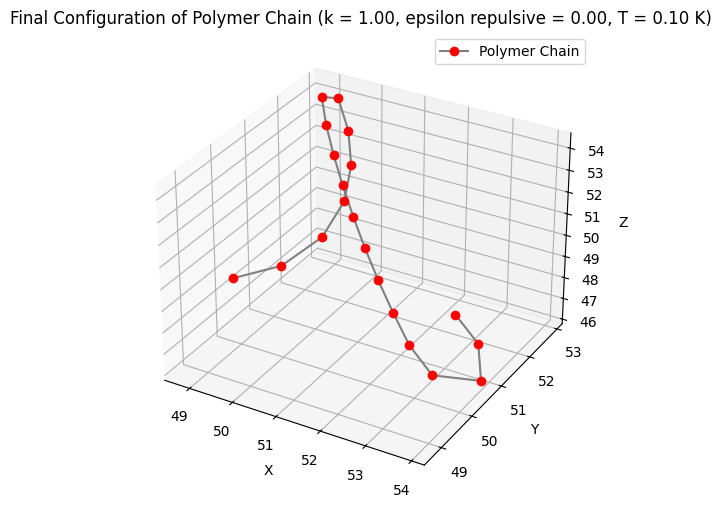

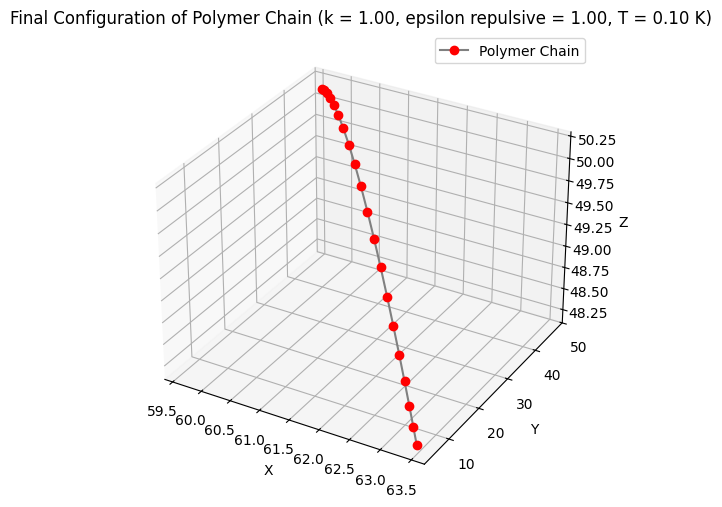

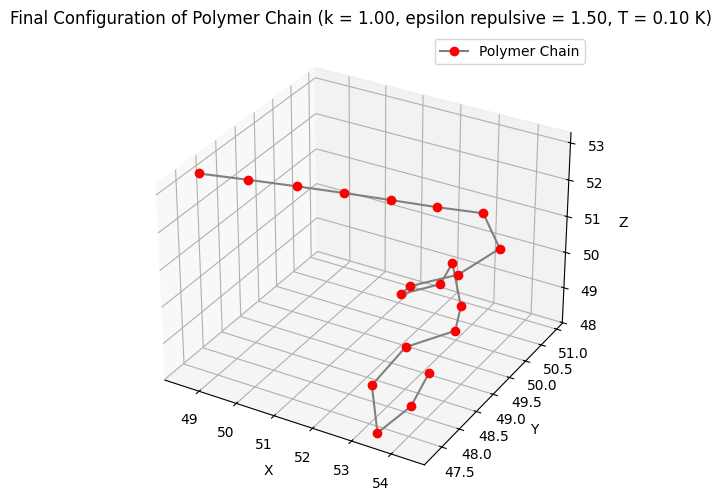

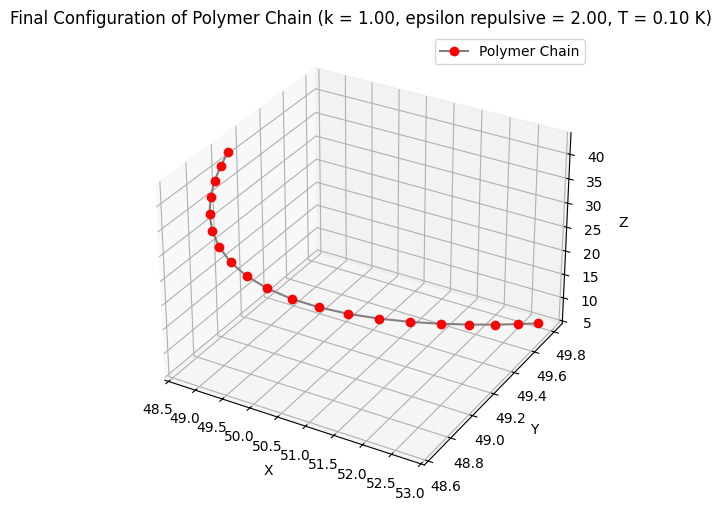

In [12]:
#Simulation 2: Varying k at low temp
e_reps = np.linspace(0, 2, 5)
k = 1
target_temp = 0.1

Rg_values = []
Ree_values = []
potential_energies = []

for epsilon_repulsive in e_reps:
    # Re-initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, T, mass)
    
    # Run simulation
    positions_history = []
    potential_energy_sum = 0
    for step in range(total_steps):
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive

        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass)

        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, T, mass)
            
            positions_history.append(positions.copy())

        # Accumulate potential energy 
        potential_energy_sum += compute_potential_energy(positions, k, r0, epsilon_repulsive, epsilon_attractive, sigma, box_size)
   
    # Compute properties
    Rg = calculate_radius_of_gyration(positions)
    Ree = calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    potential_energies.append(np.mean(potential_energy_sum))
    
    # Plot the final configurations of the polymer chain
    final_positions = positions_history[-1]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2], '-o', color ='grey', markerfacecolor ='red', markeredgecolor ='red', label='Polymer Chain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Final Configuration of Polymer Chain (k = {k:.2f}, epsilon repulsive = {epsilon_repulsive:.2f}, T = {target_temp:.2f} K)')
    ax.legend()
    plt.show()



<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:15: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:24: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_86063/1148339317.py:4: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Repulsive Epsilon ($\epsilon_{rep}$)')
/tmp/ipykernel_86063/1148339317.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Radius of Gyration vs Repulsive Epsilon ($\epsilon_{rep}$)')
/tmp/ipykernel_86063/1148339317.py:13: SyntaxWarning: invalid escape sequence '\e'
  plt.xlabel('Repu

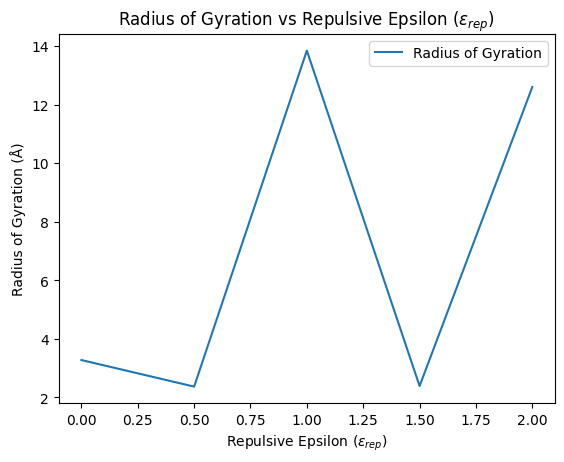

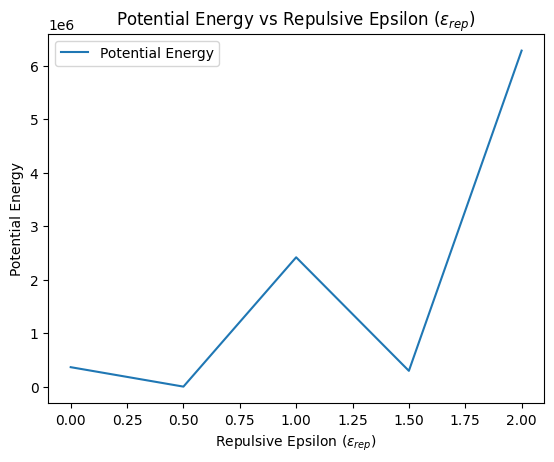

In [15]:
# Plot Radius of Gyration vs spring constant
plt.figure()
plt.plot(e_reps, Rg_values, label='Radius of Gyration')
plt.xlabel('Repulsive Epsilon ($\epsilon_{rep}$)')
plt.ylabel('Radius of Gyration (Å)')
plt.title('Radius of Gyration vs Repulsive Epsilon ($\epsilon_{rep}$)')
plt.legend()
plt.show()

# Plot End-to-End Distance vs spring constant
plt.figure()
plt.plot(e_reps, Ree_values, label='End-to-End Distance')
plt.xlabel('Repulsive Epsilon ($\epsilon_{rep}$)')
plt.ylabel('End-to-End Distance (Å)')
plt.title('End-to-End Distance vs Repulsive Epsilon ($\epsilon_{rep}$)')
plt.legend()
plt.show()

# Plot Potential Energy vs spring constant
plt.figure()
plt.plot(e_reps, potential_energies, label='Potential Energy')
plt.xlabel('Repulsive Epsilon ($\epsilon_{rep}$)')
plt.ylabel('Potential Energy')
plt.title('Potential Energy vs Repulsive Epsilon ($\epsilon_{rep}$)')
plt.legend()
plt.show()

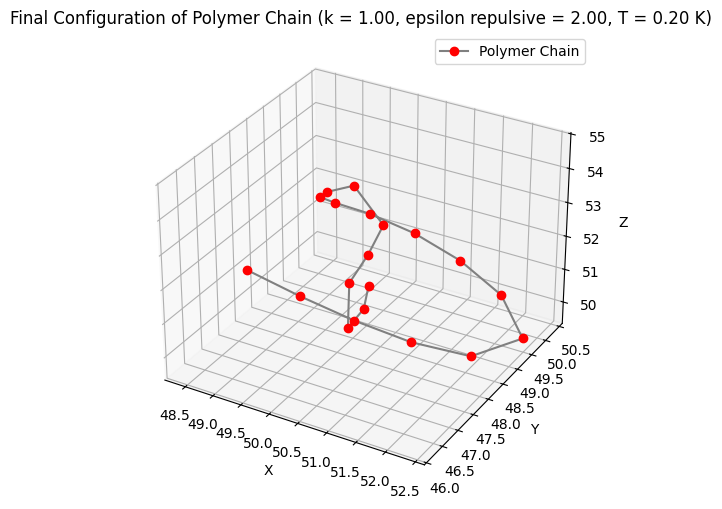

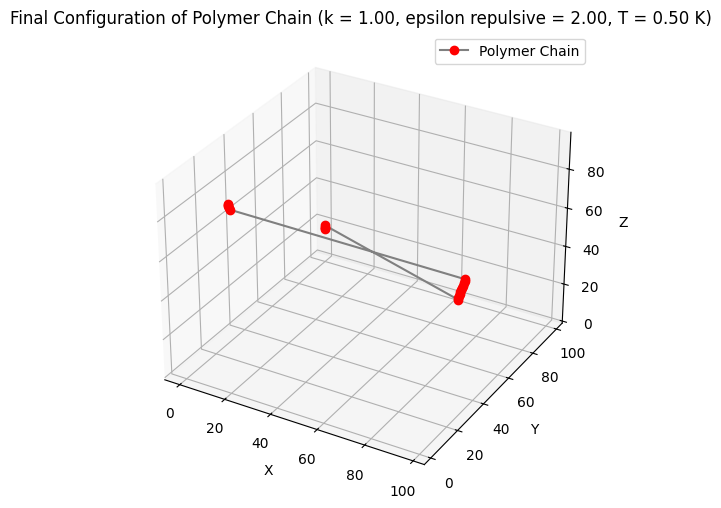

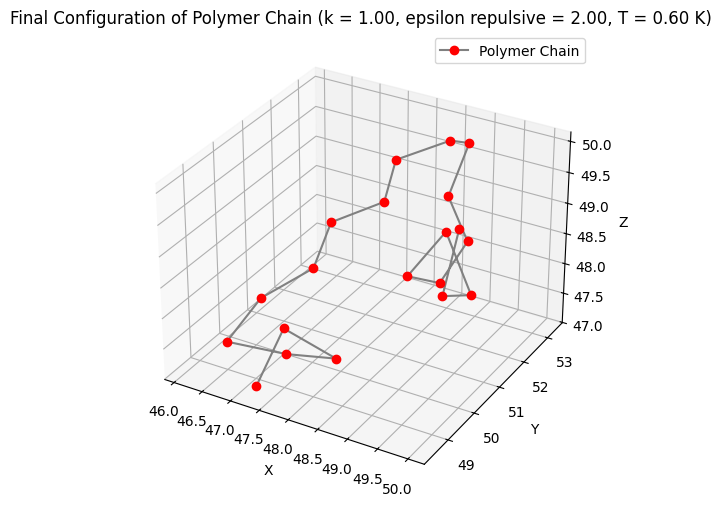

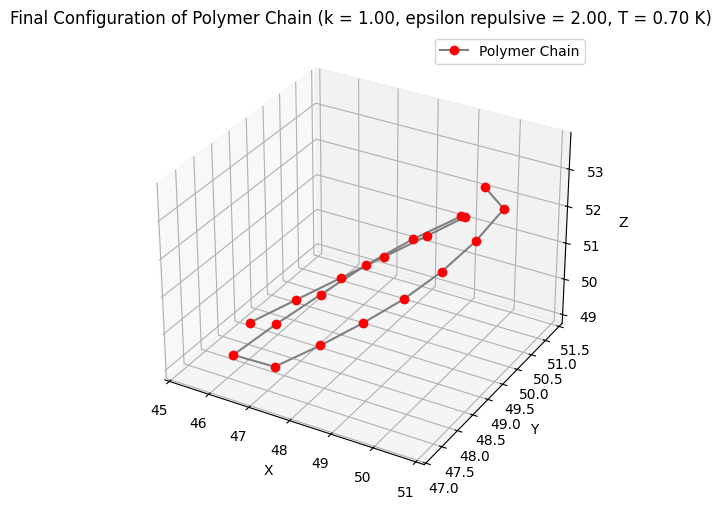

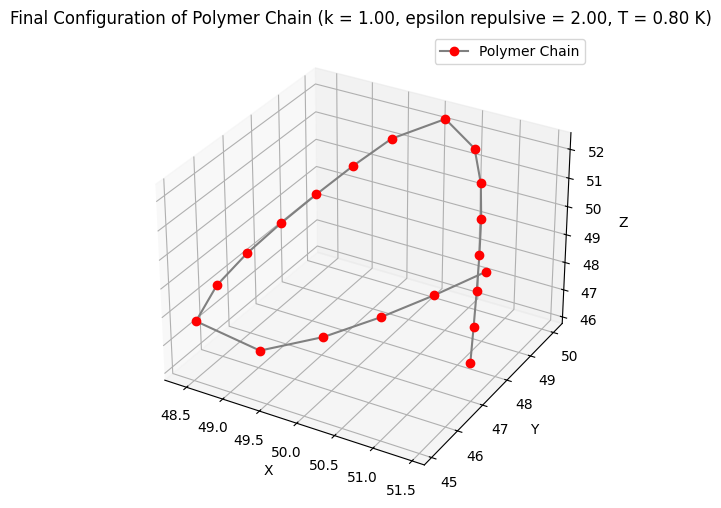

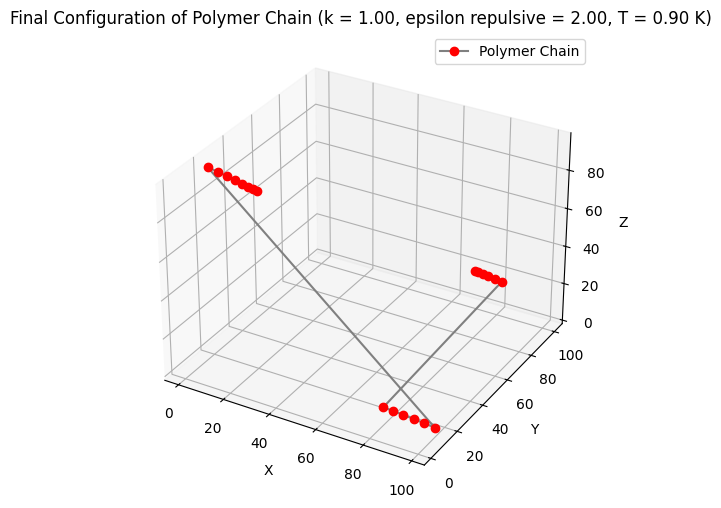

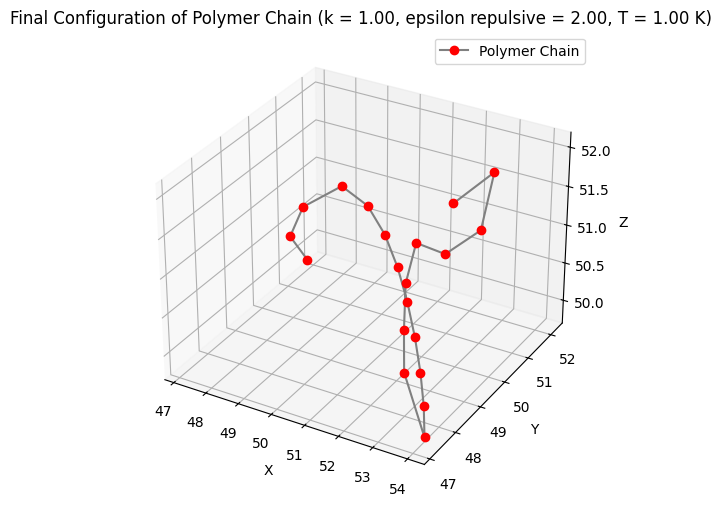

In [16]:
#Final Simulation: k = 1 e_rep = 2
k = 1
e_repulsive = 2
temperatures = np.linspace(0.1, 1.0, 10)

Rg_values = []
Ree_values = []
potential_energies = []

for T in temperatures:
    # Set target temperature
    target_temperature = T
    # Re-initialize positions and velocities
    positions = initialize_chain(n_particles, box_size, r0)
    velocities = initialize_velocities(n_particles, T, mass)
    
    # Run simulation
    positions_history = []
    potential_energy_sum = 0
    for step in range(total_steps):
        forces_harmonic = compute_harmonic_forces(positions, k, r0, box_size)
        forces_repulsive = compute_lennard_jones_forces(positions, epsilon_repulsive, sigma, box_size, 'repulsive')
        forces_attractive = compute_lennard_jones_forces(positions, epsilon_attractive, sigma, box_size, 'attractive')
        total_forces = forces_harmonic + forces_repulsive + forces_attractive

        positions, velocities, total_forces = velocity_verlet(positions, velocities, total_forces, dt, mass)

        if step % rescale_interval == 0:
            velocities = rescale_velocities(velocities, T, mass)
            
            positions_history.append(positions.copy())

        # Accumulate potential energy 
        potential_energy_sum += compute_potential_energy(positions, k, r0, epsilon_repulsive, epsilon_attractive, sigma, box_size)
   
    # Compute analysis properties
    Rg = calculate_radius_of_gyration(positions)
    Ree = calculate_end_to_end_distance(positions)
    Rg_values.append(Rg)
    Ree_values.append(Ree)
    potential_energies.append(np.mean(potential_energy_sum))
    
    # Plot the final configurations of the polymer chain
    final_positions = positions_history[-1]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(final_positions[:, 0], final_positions[:, 1], final_positions[:, 2], '-o', color ='grey', markerfacecolor ='red', markeredgecolor ='red', label='Polymer Chain')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Final Configuration of Polymer Chain (k = {k:.2f}, epsilon repulsive = {epsilon_repulsive:.2f}, T = {T:.2f} K)')
    ax.legend()
    plt.show()



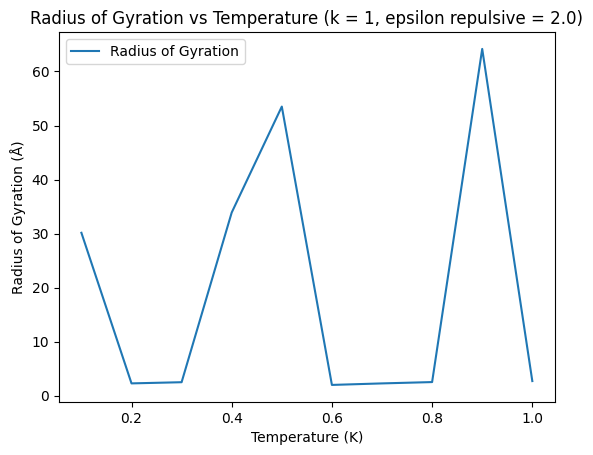

In [17]:
# Plot Radius of Gyration vs Temperature
plt.figure()
plt.plot(temperatures, Rg_values, label='Radius of Gyration')
plt.xlabel('Temperature (K)')
plt.ylabel('Radius of Gyration (Å)')
plt.title(f'Radius of Gyration vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()

# Plot End-to-End Distance vs Temperature
plt.figure()
plt.plot(temperatures, Ree_values, label='End-to-End Distance')
plt.xlabel('Temperature (K)')
plt.ylabel('End-to-End Distance (Å)')
plt.title(f'End-to-End Distance vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()

# Plot Potential Energy vs Temperature
plt.figure()
plt.plot(temperatures, potential_energies, label='Potential Energy')
plt.xlabel('Temperature (K)')
plt.ylabel('Potential Energy')
plt.title(f'Potential Energy vs Temperature (k = {k}, epsilon repulsive = {epsilon_repulsive})')
plt.legend()
plt.show()